# Pytorch basics

–¶–µ–ª–∏:

* –ü–æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è —Å —Ç–µ–Ω–∑–æ—Ä–∞–º–∏ –∏ –∫–∞–∫ —Å –Ω–∏–º–∏ —Ä–∞–±–æ—Ç–∞—Ç—å
* –ü–æ–ª—É—á–∏—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –æ —Ñ—É–Ω–∫—Ü–∏—è—Ö –ø–æ—Ç–µ—Ä—å, –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–º —Å–ø—É—Å–∫–µ –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
* –ü–æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è —Å —Å—É–ø–µ—Ä-–∫—Ä–∞—Ç–∫–æ–π –∏—Å—Ç–æ—Ä–∏–µ–π –≥–µ–Ω–µ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ AI

–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ:

* [–û—Å–Ω–æ–≤—ã pytorch](#basics)
  * [—Ç–µ–Ω–∑–æ—Ä—ã](#tensors)
  * [–æ–ø–µ—Ä–∞—Ü–∏–∏ —Å —Ç–µ–Ω–∑–æ—Ä–∞–º–∏](#operations)
  * [–ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –≤–∏–¥–µ —Ç–µ–Ω–∑–æ—Ä–æ–≤](#images)
  * [—Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–∏ —Ç–µ–Ω–∑–æ—Ä–æ–≤](#transform)
* [–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫](#descent)
* [–ú–µ—Ç–æ–¥—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏](#loss)
* [–ü—Ä–∏–º–∏—Ç–∏–≤–Ω–∞—è –Ω–µ–π—Ä–æ—Å–µ—Ç—å](#nn)
* [–ò—Å—Ç–æ—Ä–∏—è –≥–µ–Ω–µ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ AI](#history)

–°—Å—ã–ª–∫–∏:

* D. Foster Generative Deep Learning, 2nd Edition
* [Pytorch basics lesson from The Generative Landscape course](https://johnowhitaker.github.io/tglcourse/pytorch_basics.html)


<a name="basics"></a>
## –û—Å–Ω–æ–≤—ã pytorch

NOTE: –ù–æ—É—Ç–±—É–∫ –ø–æ—Å—Ç—Ä–æ–µ–Ω –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ–¥–Ω–æ–∏–º—ë–Ω–Ω–æ–≥–æ —É—Ä–æ–∫–∞ –∏–∑ –∫—É—Ä—Å–∞ The Generative Landscape on John Whitaker (—Å—Å—ã–ª–∫–∞ –≤—ã—à–µ)


In [ ]:
import torch
import requests
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from PIL import Image
from io import BytesIO
#
import IPython.display as ipd

def load_image_pil(fn, size=None):
    im = Image.open(fn).convert('RGB')
    if size != None:
        im = im.resize(size)
    return im

def pil_from_url(url, size=None):
    response = requests.get(url)
    im = Image.open(BytesIO(response.content)).convert('RGB')
    if size != None:
        im = im.resize(size)
    return im

def pil_to_tensor(im):
    im = np.array(im) # To numpy array
    im = torch.tensor(im) # To tensor
    im = im.permute(2, 0, 1) # Rearrange dimensions
    im = im.unsqueeze(0) # Add batch dimension first
    return im/255.0 # Scale down to (0, 1)

def tensor_to_pil(tensor_im):
    tensor_im = tensor_im.squeeze() # In case there is a batch dimension
    tensor_im = tensor_im.detach().cpu() # Detach from computational graph
    tensor_im = tensor_im.permute(1, 2, 0) # Rearrange the channels
    tensor_im = tensor_im.clip(0, 1)*255 # Note that we clip to (0, 1) before scaling to (0, 255)
    im_array = np.array(tensor_im).astype(np.uint8) # Convert to int as required by PIL
    im = Image.fromarray(im_array) # Convert to PIL image
    return im

<a name="tensors"></a>
### –¢–µ–Ω–∑–æ—Ä—ã

–°–æ–∑–¥–∞–Ω–∏–µ —Ç–µ–Ω–∑–æ—Ä–æ–≤ –∏–∑ —Å–ø–∏—Å–∫–∞

In [ ]:
torch.tensor([0, 1, 2])

tensor([0, 1, 2])

–∏–∑ –∫–æ—Ä—Ç–µ–∂–∞

In [ ]:
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)
print(f"Tensor shape: {b.shape}")
b

Tensor shape: torch.Size([2, 2])


tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])

–∏–ª–∏ numpy-–º–∞—Å—Å–∏–≤–∞

In [ ]:
c = np.ones([2, 3])
torch.tensor(c)

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

–î—Ä—É–≥–∏–µ –∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä—ã, –∞—Ä–≥—É–º–µ–Ω—Ç—ã –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç —Ä–∞–∑–º–µ—Ä —Ç–µ–Ω–∑–æ—Ä–∞

In [ ]:
x = torch.ones(5, 3)
y = torch.zeros(2)
z = torch.empty(1, 1, 5)
print(f"Tensor x: {x}")
print(f"Tensor y: {y}")
print(f"Tensor z: {z}")

Tensor x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Tensor y: tensor([0., 0.])
Tensor z: tensor([[[1.0713e-28, 3.1540e-41, 1.1051e-28, 3.1540e-41, 7.8699e+28]]])


`.empty()` –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –Ω–µ –Ω—É–ª–∏, –∞ –∫–∞–∫–∏–µ-—Ç–æ —Ä–∞–Ω–¥–æ–º–Ω—ã–µ —á–∏—Å–ª–∞. –í –æ—Ç–ª–∏—á–∏–µ –æ—Ç `.zeros()`, –∫–æ—Ç–æ—Ä—ã–π –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ—Ç —Ç–µ–Ω–∑–æ—Ä —Å—Ç—Ä–æ–≥–æ —Å –Ω—É–ª—è–º–∏, `.empty()` –ø—Ä–æ—Å—Ç–æ –∞–ª–ª–æ—Ü–∏—Ä—É–µ—Ç –ø–∞–º—è—Ç—å, —á—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–µ–º–Ω–æ–≥–æ –±—ã—Å—Ç—Ä–µ–µ.

–ö–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä—ã –¥–ª—è —Å–ª—É—á–∞–π–Ω—ã—Ö —á–∏—Å–µ–ª

In [ ]:
# uniform distribution
a = torch.rand(1, 3)

# normal distribution
b = torch.randn(3, 4)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")

Tensor a: tensor([[0.8274, 0.5125, 0.0714]])
Tensor b: tensor([[-0.6696,  0.4547, -1.9495, -0.8356],
        [-0.7538, -0.3375,  1.5976, -0.7722],
        [-0.3633,  0.2247,  0.5142,  1.3930]])


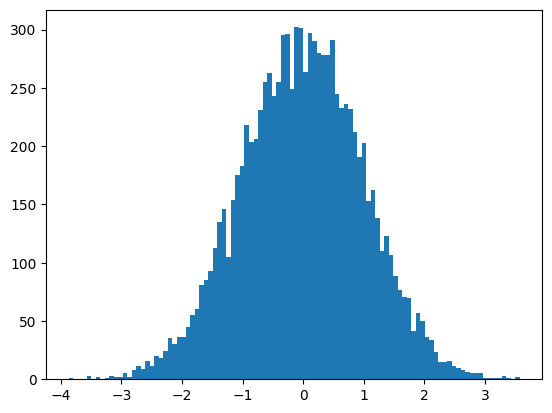

In [ ]:
plt.hist(torch.randn(10000), bins=100);

–ï—Å—Ç—å –∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä—ã –¥–ª—è —Ç–µ–Ω–∑–æ—Ä–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∑–≤–æ–ª—è—é—Ç —Å–æ–∑–¥–∞–≤–∞—Ç—å —Ç–µ–Ω–∑–æ—Ä—ã —Å —Ç–∞–∫–∏–º –∂–µ —Ä–∞–∑–º–µ—Ä–æ–º, –∫–∞–∫ –∑–∞–¥–∞–Ω–Ω—ã–µ:

In [ ]:
c = torch.zeros_like(a)
d = torch.rand_like(c)
print(f"Tensor c: {c}")
print(f"Tensor d: {d}")

Tensor c: tensor([[0., 0., 0.]])
Tensor d: tensor([[0.7038, 0.1876, 0.0834]])


`.arange()` –∏ `.linspace()` —Ä–∞–±–æ—Ç–∞—é—Ç —Ç–∞–∫–∂–µ, –∫–∞–∫ –≤ numpy

In [ ]:
a = torch.arange(0, 1, step=0.1) # Equivalent to np.arange(0, 10, step=1)
b = torch.linspace(0, 5, steps=12) # np.linspace(0, 5, num=11)

print(f"Tensor a: {a}\n")
print(f"Tensor b: {b}\n")

Tensor a: tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000])

Tensor b: tensor([0.0000, 0.4545, 0.9091, 1.3636, 1.8182, 2.2727, 2.7273, 3.1818, 3.6364,
        4.0909, 4.5455, 5.0000])



<a name="operations"></a>
### –û–ø–µ—Ä–∞—Ü–∏–∏ —Å —Ç–µ–Ω–∑–æ—Ä–∞–º–∏

–ú–æ–∂–Ω–æ –≤—ã–ø–æ–ª–Ω—è—Ç—å –æ–ø–µ—Ä–∞—Ü–∏–∏ —Å —Ç–µ–Ω–∑–æ—Ä–∞–º–∏ —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–æ–≤ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ torch. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –≤ pytorch –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ python-–æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–µ—Ä–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –∏ –º–æ–∂–Ω–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∏–º–∏. –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –∞—Ä–∏—Ñ–º–µ—Ç–∏—á–µ—Å–∫–∏–µ –æ–ø–µ—Ä–∞—Ç–æ—Ä—ã `(+, -, *, /, –∏ **)` —Ä–∞–±–æ—Ç–∞—é—Ç –∫–∞–∫ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø–æ—ç–ª–µ–º–µ–Ω—Ç–Ω—ã–µ –æ–ø–µ—Ä–∞—Ü–∏–∏.

#### –°–æ–∑–¥–∞–Ω–∏–µ —Ç–µ–Ω–∑–æ—Ä–æ–≤

In [ ]:
x = torch.tensor([1, 2, 4, 8])
y = torch.tensor([1, 2, 3, 4])
print('–°–ª–æ–∂–µ–Ω–∏–µ —Å –ø–æ–º–æ—â—å—é torch.add:', torch.add(x, y))
print('–°–ª–æ–∂–µ–Ω–∏–µ —Å –ø–æ–º–æ—â—å—é "+":', x + y) # The same
print('–ò –¥—Ä—É–≥–∏–µ –æ–ø–µ—Ä–∞—Ü–∏–∏:')
x + y, x - y, x * y, x / y, x**y  # The ** operator is exponentiation

–°–ª–æ–∂–µ–Ω–∏–µ —Å –ø–æ–º–æ—â—å—é torch.add: tensor([ 2,  4,  7, 12])
–°–ª–æ–∂–µ–Ω–∏–µ —Å –ø–æ–º–æ—â—å—é "+": tensor([ 2,  4,  7, 12])
–ò –¥—Ä—É–≥–∏–µ –æ–ø–µ—Ä–∞—Ü–∏–∏:


(tensor([ 2,  4,  7, 12]),
 tensor([0, 0, 1, 4]),
 tensor([ 1,  4, 12, 32]),
 tensor([1.0000, 1.0000, 1.3333, 2.0000]),
 tensor([   1,    4,   64, 4096]))

–£ —Ç–µ–Ω–∑–æ—Ä–æ–≤ –µ—Å—Ç—å –º–Ω–æ–≥–æ –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤, –Ω–∞–ø—Ä–∏–º–µ—Ä `.mean()` –∏–ª–∏ `.sum()` (–ø–æ–ª–Ω—ã–π —Å–ø–∏—Å–æ–∫: https://pytorch.org/docs/stable/tensors.html). –û–¥–Ω–∞–∫–æ, –ø—Ä–∏ —Ä–∞–±–æ—Ç–µ —Å –º–Ω–æ–≥–æ–º–µ—Ä–Ω—ã–º–∏ —Ç–µ–Ω–∑–æ—Ä–∞–º–∏ –Ω—É–∂–Ω–æ –±—ã—Ç—å –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω—ã–º —Å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—è–º–∏.

In [ ]:
x = torch.rand(2, 3)
print('x:\n', x)
print(f"–°—É–º–º–∞ –≤—Å–µ—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ x: {x.sum()}")
print(f"–°—É–º–º–∞ —Å—Ç—Ä–æ–∫ x: {x.sum(axis=0)}")
print(f"–°—É–º–º–∞ —Å—Ç–æ–ª–±—Ü–æ–≤ x: {x.sum(axis=1)}")

x:
 tensor([[0.3733, 0.7838, 0.5002],
        [0.2961, 0.3843, 0.1668],
        [0.3935, 0.1864, 0.1581]])
–°—É–º–º–∞ –≤—Å–µ—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ x: 3.2424821853637695
–°—É–º–º–∞ —Å—Ç–æ–ª–±—Ü–æ–≤ x: tensor([1.0628, 1.3545, 0.8251])
–°—É–º–º–∞ —Å—Ç—Ä–æ–∫ x: tensor([1.6573, 0.8472, 0.7379])


–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∞—Ä–∏—Ñ–º–µ—Ç–∏—á–µ—Å–∫–∏—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–æ—ç–ª–µ–º–µ–Ω—Ç–Ω—ã–µ. –î–ª—è –º–∞—Ç—Ä–∏—á–Ω–æ–≥–æ —É–º–Ω–æ–∂–µ–Ω–∏—è –µ—Å—Ç—å `torch.matmul()` –∏–ª–∏ —Å–∏–º–≤–æ–ª `@`. –î–ª—è —Å–∫–∞–ª—è—Ä–Ω–æ–≥–æ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏—è –æ–¥–Ω–æ–º–µ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `torch.dot()`.

–î–ª—è —Ç—Ä–∞—Å–ø–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏—è –¥–≤—É–º–µ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è `torch.t(`) –∏–ª–∏ `Tensor.T`.

In [ ]:
a = torch.rand(2, 3)
b = a.T
print('a.shape:', a.shape, 'b.shape:', b.shape)
print('a:', a)
print('b:', b)
print(a@b) # Matrix multiplication of a 2x3 with a 3x2 matrix gives a 2x2 result.

a.shape: torch.Size([2, 3]) b.shape: torch.Size([3, 2])
a: tensor([[0.7765, 0.2682, 0.7410],
        [0.8398, 0.9468, 0.9821]])
b: tensor([[0.7765, 0.8398],
        [0.2682, 0.9468],
        [0.7410, 0.9821]])
tensor([[1.2239, 1.6338],
        [1.6338, 2.5662]])


#### –†–∞–±–æ—Ç–∞ —Å —Ç–µ–Ω–∑–æ—Ä–∞–º–∏

–ü–æ–º–∏–º–æ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –æ–ø–µ—Ä–∞—Ü–∏–π, —á–∞—Å—Ç–æ –Ω—É–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –¥–æ—Å—Ç—É–ø –∫ –Ω–µ–∫–æ—Ç–æ—Ä—ã–º —ç–ª–µ–º–µ–Ω—Ç–∞–º –∏–ª–∏ –∏—Ö –º–Ω–æ–∂–µ—Å—Ç–≤–∞–º, –∏–ª–∏ –∏–∑–º–µ–Ω–∏—Ç—å —Ä–∞–∑–º–µ—Ä —Ç–µ–Ω–∑–æ—Ä–∞.
–ù–∏–∂–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–º–µ—Ä–æ–≤ —Ç–∞–∫–∏—Ö –æ–ø–µ—Ä–∞—Ü–∏–π.

In [ ]:
# Indexing tensors
x = torch.arange(0, 10)
print(x)
print(x[-1])
print(x[1:3]) # From index 1 up to but NOT INCLUDING index 3
print(x[:-2])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor(9)
tensor([1, 2])
tensor([0, 1, 2, 3, 4, 5, 6, 7])


In [ ]:
print('Starting tensor:')
z = torch.arange(1, 13)
print('z.shape:', z.shape)
print(f'z: {z}\n')

print('Reshaping to (3, 4):')
z = z.reshape(3, 4)
print('z.shape:', z.shape)
print(f'z:{z}\n')

print('Flattening:')
z = z.flatten()
print('z.shape:', z.shape)
print(f'z: {z}')

Starting tensor:
z.shape: torch.Size([12])
z: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Reshaping to (3, 4):
z.shape: torch.Size([3, 4])
z:tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Flattening:
z.shape: torch.Size([12])
z: tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])


–î–ª—è –∫–æ–Ω–∫–∞—Ç–µ–Ω–∞—Ü–∏–∏ —Ç–µ–Ω–∑–æ—Ä–æ–≤ —Å–ª—É–∂–∏—Ç `torch.cat` - –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ –ø—Ä–∏–º–µ—Ä—ã –Ω–∏–∂–µ –∏ –æ–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ –∫–∞–∫ —É–∫–∞–∑–∞–Ω–Ω—ã–π —Ä–∞–∑–º–µ—Ä –≤–ª–∏—è–µ—Ç –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç:

In [ ]:
# Create two tensors of the same shape
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

# concatenate them along rows
cat_rows = torch.cat((x, y), dim=0)

# concatenate along columns
cat_cols = torch.cat((x, y), dim=1)

# printing outputs
print('Concatenated by rows: shape{} \n {}'.format(list(cat_rows.shape), cat_rows))
print('\n Concatenated by colums: shape{}  \n {}'.format(list(cat_cols.shape), cat_cols))

Concatenated by rows: shape[6, 4] 
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

 Concatenated by colums: shape[3, 8]  
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


#### –£–±–∏—Ä–∞–µ–º –ø—É—Å—Ç—É—é —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å (squeeze)

–ü—Ä–∏ —Ä–∞–±–æ—Ç–µ —Å –±–∞—Ç—á–∞–º–∏, —á–∞—Å—Ç–æ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è —Å—Ç–∞–ª–∫–∏–≤–∞—Ç—å—Å—è —Å –µ–¥–∏–Ω–∏—á–Ω—ã–º–∏ (singleton) —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—è–º–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä [1,10] –∏–ª–∏ [256, 1, 3]. –¢–∞–∫–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –º–æ–≥—É—Ç —Å–æ–∑–¥–∞—Ç—å —Å–ª–æ–∂–Ω–æ—Å—Ç–∏ —Å –º–∞—Ç—Ä–∏—á–Ω—ã–º–∏ –æ–ø–µ—Ä–∞—Ü–∏—è–º–∏.

–î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —É–±—Ä–∞—Ç—å –µ–¥–∏–Ω–∏—á–Ω—ã–µ —Ä–∞–∑–º–µ–Ω–æ—Å—Ç–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –º–µ—Ç–æ–¥ `.squeeze()`, –∞ –Ω–∞–æ–æ–±–æ—Ä–æ—Ç –¥–ª—è –¥–æ–±–∞–≤–ª–µ–Ω–∏—è - –º–µ—Ç–æ–¥ `.unsqueeze()`.

In [ ]:
x = torch.randn(1, 10)
print(x.shape)
print(f"x[0]: {x[0]}") # printing the zeroth element of the tensor will not give us the first number!

torch.Size([1, 10])
x[0]: tensor([-0.3177, -0.4882, -0.4214,  0.4627, -0.1080, -0.1135, -1.6205, -0.8416,
        -1.5820,  1.6113])


–ò–∑–±–∞–≤–∏–º—Å—è –æ—Ç –µ–¥–∏–Ω–∏—á–Ω–æ–≥–æ –∏–∑–º–µ—Ä–µ–Ω–∏—è:

In [ ]:
x = x.squeeze(0)
print(x.shape)
print(f"x[0]: {x[0]}")

torch.Size([10])
x[0]: -0.31769752502441406


–î–æ–±–∞–≤–∏–º –µ–¥–∏–Ω–∏—á–Ω–æ–µ –∏–∑–º–µ—Ä–µ–Ω–∏–µ:

In [ ]:
y = torch.randn(5, 5)
print(f"shape of y: {y.shape}")

y = y.unsqueeze(1) # Note the argument here is 1 - try 0 and 2 and make sure you get a feel for what unsqueeze does.
print(f"shape of y: {y.shape}")

shape of y: torch.Size([5, 5])
shape of y: torch.Size([5, 1, 5])


<a name="images"></a>
### –ü—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –≤–∏–¥–µ —Ç–µ–Ω–∑–æ—Ä–æ–≤

In [ ]:
!wget -O frog.png https://github.com/johnowhitaker/tglcourse/blob/f9ef8a82d6a16838dee7f347d5fbcbada3eb060f/images/frog.png?raw=true

--2023-08-05 16:07:01--  https://github.com/johnowhitaker/tglcourse/blob/f9ef8a82d6a16838dee7f347d5fbcbada3eb060f/images/frog.png?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/johnowhitaker/tglcourse/raw/f9ef8a82d6a16838dee7f347d5fbcbada3eb060f/images/frog.png [following]
--2023-08-05 16:07:02--  https://github.com/johnowhitaker/tglcourse/raw/f9ef8a82d6a16838dee7f347d5fbcbada3eb060f/images/frog.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/johnowhitaker/tglcourse/f9ef8a82d6a16838dee7f347d5fbcbada3eb060f/images/frog.png [following]
--2023-08-05 16:07:02--  https://raw.githubusercontent.com/johnowhitaker/tglcourse/f9ef8a82d6a16838dee7f347d5fbcbada3eb060f/images/frog.png
Resolving raw.githubusercontent.com (raw.githubusercontent

#### –ö–∞—Ä—Ç–∏–Ω–∫–∏ –∫–∞–∫ –º–∞—Å—Å–∏–≤—ã —á–∏—Å–µ–ª

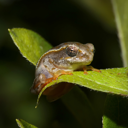

In [ ]:
im = Image.open('./frog.png').convert('RGB').resize((128, 128))
im

In [ ]:
np.array(im).shape # Remove .convert('RGB') in the cell above and see how this changes

(128, 128, 3)

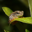

In [ ]:
load_image_pil('frog.png', size=(32, 32))

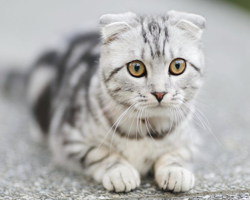

In [ ]:
pil_from_url("https://images.pexels.com/photos/156934/pexels-photo-156934.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1", size=(250, 200))

#### –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ —Ç–µ–Ω–∑–æ—Ä—ã

In [ ]:
im = load_image_pil('frog.png', size=(32, 32))
image_array = np.array(im)
image_array.shape

(32, 32, 3)

–î–∞–Ω–Ω—ã–π –º–∞—Å—Å–∏–≤ –∏–º–µ–µ—Ç —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å (32, 32, 3). (3) - —ç—Ç–æ —á–∏—Å–ª–æ –∫–∞–Ω–∞–ª–æ–≤ (Red, Green, Blue). –ó–Ω–∞—á–µ–Ω–∏—è –≤ –º–∞—Å—Å–∏–≤–µ - —Ü–µ–ª—ã–µ —á–∏—Å–ª–∞ –æ—Ç 0 –¥–æ 255 (8-bit numbers). –î–ª—è —Å–æ–≤–º–µ—Å—Ç–∏–º–æ—Å—Ç–∏ —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º–∏ –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–∞–º–∏ pytorch, –∏–∑–º–µ–Ω–∏–º –ø–æ—Ä—è–¥–æ–∫ –∏–∑–º–µ—Ä–µ–Ω–∏–π —Ç–∞–∫, —á—Ç–æ —á–∏—Å–ª–æ –∫–∞–Ω–∞–ª–æ–≤ —Å—Ç–∞–Ω–µ—Ç –∏–¥—Ç–∏ –ø–µ—Ä–≤—ã–º –∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∫–∞–∫ —á–∏—Å–ª–∞ —Å –∑–∞–ø—è—Ç–æ–π –æ—Ç 0 –¥–æ 1:

In [ ]:
tensor_im = torch.tensor(np.array(im)).permute(2, 0, 1)/255.0
tensor_im.shape

torch.Size([3, 32, 32])

In [ ]:
tensor_im.min(), tensor_im.max()

(tensor(0.), tensor(0.7804))

–¢–∞–∫–∂–µ –¥–ª—è –ø–æ–¥–æ–±–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ü–∏–π –µ—Å—Ç—å –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ torchvision:

In [ ]:
to_tensor_transform = torchvision.transforms.ToTensor()
to_tensor_transform(im).shape

torch.Size([3, 32, 32])

Channels-first –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ –ø–æ–ø—É–ª—è—Ä–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ, –Ω–æ –Ω–µ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ - –æ–±—Ä–∞—â–∞–π—Ç–µ –Ω–∞ —ç—Ç–æ –≤–Ω–∏–º–∞–Ω–∏–µ, –∫–æ–≥–¥–∞ –±—É–¥–µ—Ç–µ —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∫–æ–¥–æ–º –¥—Ä—É–≥–∏—Ö –ª—é–¥–µ–π.

–¢–∞–∫–∂–µ –æ–±—ã—á–Ω–æ pytorch —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –±–∞—Ç—á–∞–º–∏ –¥–∞–Ω–Ω—ã—Ö –∏ —Ç–µ–Ω–∑–æ—Ä—ã –¥–ª—è –±–∞—Ç—á–µ–π –æ–±—ã—á–Ω–æ –∏–º–µ—é—Ç —Ñ–æ—Ä–º—É (batch_size, channels, width, height).

–í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∏–∑ –Ω–∞—á–∞–ª–∞ –Ω–æ—É—Ç–±—É–∫–∞ —Å–ª—É–∂–∞—Ç –¥–ª—è –æ–ø–µ—Ä–∞—Ü–∏–π –∑–∞–≥—Ä—É–∑–∫–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ —Ç–µ–Ω–∑–æ—Ä—ã –∏ –æ–±—Ä–∞—Ç–Ω–æ:

torch.Size([1, 3, 128, 128])
<class 'PIL.Image.Image'>


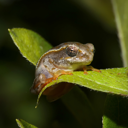

In [ ]:
im = load_image_pil('frog.png', size=(128, 128)) # Load an image
tensor_im = pil_to_tensor(im) # To tensor with our function
print(tensor_im.shape)
im_out = tensor_to_pil(tensor_im) # And back to a PIL imge
print(type(im_out))
im_out

–ú–æ–∂–Ω–æ —Å –ø–æ–º–æ—â—å—é matplotlib –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫ –≤—ã–≥–ª—è–¥—è—Ç –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –ø–æ –æ—Ç–¥–µ–ª—å–Ω—ã–º –∫–∞–Ω–∞–ª–∞–º:

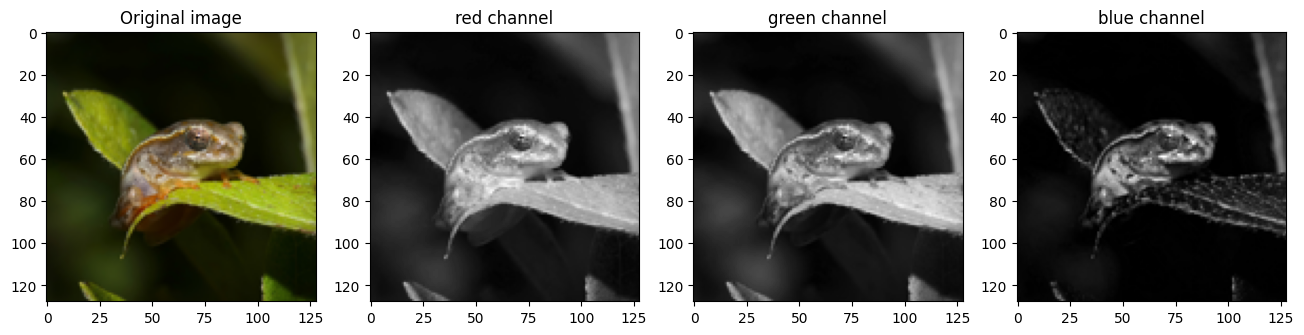

In [ ]:
# Plotting the original image and the three color channels
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(tensor_im[0].permute(1, 2, 0)) # Note: we need to rearrange the color channels
axs[0].set_title('Original image')
colors = ['red', 'green', 'blue']
for i in range(1, 4):
    axs[i].imshow(tensor_im[0][i-1], cmap='gray')
    axs[i].set_title(f'{colors[i-1]} channel')

–¢–∞–∫ –∫–∞–∫ —ç—Ç–æ —Ç–µ–Ω–∑–æ—Ä, —Ç–æ –º–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å –µ–≥–æ —á–∞—Å—Ç—å —Å –ø–æ–º–æ—â—å—é –∏–Ω–¥–µ–∫—Å–æ–≤:

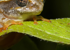

In [ ]:
cropped = tensor_im[0, :, 50:100, 50:120] # First image in batch, all channels, 50px high and 70 wide starting from (50, 50) (top left is 0, 0)
tensor_to_pil(cropped)

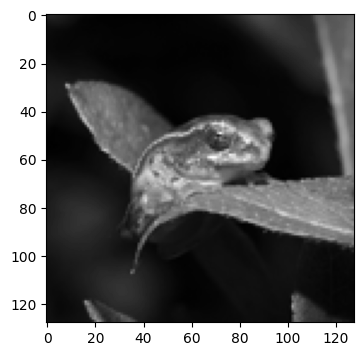

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))
axs.imshow(tensor_im.squeeze(0).mean(0), cmap='gray')

<a name="transform"></a>
#### –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ç–µ–Ω–∑–æ—Ä–æ–≤

–î–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, —Ç–∞–∫–∏—Ö –∫–∞–∫ zoom, –ø–æ–≤–æ—Ä–æ—Ç—ã, –¥–µ—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∏–ª–∏ –æ–±—Ä–µ–∑–∫–∞. –≠—Ç–æ –º–æ–∂–Ω–æ –¥–µ–ª–∞—Ç—å —Å –ø–æ–º–æ—â—å—é python-–±–∏–±–ª–∏–æ—Ç–µ–∫–∏ PIL, –Ω–æ –¥–ª—è –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ª—É—á—à–µ —ç—Ç–æ –¥–µ–ª–∞—Ç—å –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ —Å —Ç–µ–Ω–∑–æ—Ä–∞–º–∏, –¥–ª—è —ç—Ç–æ–≥–æ —Å–ª—É–∂–∏—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ torchvision. Torchvision —Å–æ–¥–µ—Ä–∂–∏—Ç –º–Ω–æ–≥–æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏–π, –≤–∫–ª—é—á–∞—è —Å–ª—É—á–∞–π–Ω—ã–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è, —É–¥–æ–±–Ω—ã–µ –¥–ª—è –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏:

In [ ]:
print(dir(torchvision.transforms)[:-16])

['AugMix', 'AutoAugment', 'AutoAugmentPolicy', 'CenterCrop', 'ColorJitter', 'Compose', 'ConvertImageDtype', 'ElasticTransform', 'FiveCrop', 'GaussianBlur', 'Grayscale', 'InterpolationMode', 'Lambda', 'LinearTransformation', 'Normalize', 'PILToTensor', 'Pad', 'RandAugment', 'RandomAdjustSharpness', 'RandomAffine', 'RandomApply', 'RandomAutocontrast', 'RandomChoice', 'RandomCrop', 'RandomEqualize', 'RandomErasing', 'RandomGrayscale', 'RandomHorizontalFlip', 'RandomInvert', 'RandomOrder', 'RandomPerspective', 'RandomPosterize', 'RandomResizedCrop', 'RandomRotation', 'RandomSolarize', 'RandomVerticalFlip', 'Resize', 'TenCrop', 'ToPILImage', 'ToTensor']


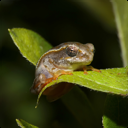

In [ ]:
transform = torchvision.transforms.RandomAffine(30)
tensor_to_pil(transform(tensor_im))

<a name="descent"></a>
## –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–ª–µ–¥—É—é—â—É—é —Å–∏—Ç—É–∞—Ü–∏—é. –î–æ–ø—É—Å—Ç–∏–º, —É –Ω–∞—Å –µ—Å—Ç—å:

- –§—É–Ω–∫—Ü–∏—è (–º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç—å—é, –º–æ–∂–µ—Ç –±—ã—Ç—å —É—Ä–∞–≤–Ω–µ–Ω–∏–µ–º –ø—Ä—è–º–æ–π –ª–∏–Ω–∏–∏...), –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –≤—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –≤—ã—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ –Ω–∞–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ - –Ω–∞–∑–æ–≤–µ–º –∏—Ö `w`
- –ù–µ–∫–æ—Ç–æ—Ä–∞—è –º–µ—Ä–∞ —Ç–æ–≥–æ, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ —ç—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç. –ú–æ–∂–µ—Ç –±—ã—Ç—å, —ç—Ç–æ —Ç–æ, –Ω–∞—Å–∫–æ–ª—å–∫–æ –ø–ª–æ—Ö–æ —Ñ—É–Ω–∫—Ü–∏—è –æ–ø–∏—Å—ã–≤–∞–µ—Ç –∫–∞–∫—É—é-—Ç–æ –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å –≤ –≤–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö, –∏–ª–∏ –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ —Å–µ—Ç—å —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –∑–∞–¥–∞—á–µ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. –î–∞–≤–∞–π—Ç–µ –Ω–∞–∑–æ–≤–µ–º —ç—Ç—É –º–µ—Ä—É "–ø–æ—Ç–µ—Ä–∏", –≥–¥–µ —Ü–µ–ª—å —Å–æ—Å—Ç–æ–∏—Ç –≤ —Ç–æ–º, —á—Ç–æ–±—ã —Å–¥–µ–ª–∞—Ç—å –µ–µ –∫–∞–∫ –º–æ–∂–Ω–æ –º–µ–Ω—å—à–µ.

–ß–∞—Å—Ç–æ –≤–æ–∑–Ω–∏–∫–∞–µ—Ç –≤–æ–ø—Ä–æ—Å: ¬´–ö–∞–∫ –Ω–∞–π—Ç–∏ –Ω–∞–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –¥–∞—é—â–∏–π –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ—Ç–µ—Ä—å?¬ª.

–ï—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å–ø–æ—Å–æ–±–æ–≤, –∫–æ—Ç–æ—Ä—ã–º–∏ –º—ã –º–æ–≥–ª–∏ –±—ã –ø–æ–ø—ã—Ç–∞—Ç—å—Å—è —Ä–µ—à–∏—Ç—å —ç—Ç—É –ø—Ä–æ–±–ª–µ–º—É. –°–∞–º—ã–º–∏ –ø—Ä–æ—Å—Ç—ã–º–∏ –º–æ–≥—É—Ç –±—ã—Ç—å:

- –ü–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –≤—Å–µ—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
- –ü–µ—Ä–µ–±—Ä–∞—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –∏ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –ª—É—á—à–∏–µ

–Ø—Å–Ω–æ, —á—Ç–æ –æ–±–∞ –º–µ—Ç–æ–¥–∞ –∏–º–µ—é—Ç —Å–µ—Ä—å–µ–∑–Ω—ã–µ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏, –∏ –∫–æ–≥–¥–∞ –º—ã –∏–º–µ–µ–º –¥–µ–ª–æ —Å —Ç—ã—Å—è—á–∞–º–∏ –∏–ª–∏ –º–∏–ª–ª–∏–æ–Ω–∞–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏. –ó–Ω–∞—á–∏—Ç, –Ω—É–∂–µ–Ω –±–æ–ª–µ–µ —Ä–∞–∑—É–º–Ω—ã–π –ø–æ–¥—Ö–æ–¥.

### –ê–ª–≥–æ—Ä–∏—Ç–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞

<img src="https://shashank-ojha.github.io/ParallelGradientDescent/non-convex.png" alt="Gradient Descent" width="600"/>

Image credit: [shashank-ojha.github.io](https://shashank-ojha.github.io/ParallelGradientDescent/)

–ß—Ç–æ, –µ—Å–ª–∏ –±—ã –º—ã –º–æ–≥–ª–∏ –Ω–∞—á–∞—Ç—å —Å –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –∞ –∑–∞—Ç–µ–º –Ω–µ–º–Ω–æ–≥–æ –∏—Ö –∏–∑–º–µ–Ω–∏—Ç—å, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å —É–ª—É—á—à–µ–Ω–∏–µ? –í –∏–¥–µ–∞–ª–µ, –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –º—ã —Ö–æ—Ç–µ–ª–∏ –±—ã –∑–Ω–∞—Ç—å, —á—Ç–æ –ø—Ä–æ–∏–∑–æ–π–¥–µ—Ç —Å –ø–æ—Ç–µ—Ä—è–º–∏, –∫–æ–≥–¥–∞ –º—ã –Ω–µ–º–Ω–æ–≥–æ –ø–æ–¥–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ–º —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –≤–≤–µ—Ä—Ö –∏–ª–∏ –≤–Ω–∏–∑. –§–æ—Ä–º–∞–ª—å–Ω–æ –º—ã —Ö–æ—Ç–µ–ª–∏ –±—ã –∑–Ω–∞—Ç—å **–≥—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ—Ç–µ—Ä—å –ø–æ —ç—Ç–æ–º—É –ø–∞—Ä–∞–º–µ—Ç—Ä—É**. –í—ã –º–æ–∂–µ—Ç–µ –¥—É–º–∞—Ç—å –æ –≥—Ä–∞–¥–∏–µ–Ω—Ç–µ –∫–∞–∫ –æ —Ç–æ–º, —á—Ç–æ –æ–Ω –≥–æ–≤–æ—Ä–∏—Ç –Ω–∞–º, –≤ –∫–∞–∫–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ –¥–≤–∏–≥–∞—Ç—å—Å—è, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –Ω–∞–∏–±–æ–ª—å—à–µ–µ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ (–∏–ª–∏ —É–º–µ–Ω—å—à–µ–Ω–∏–µ –ø–æ—Ç–µ—Ä—å, –µ—Å–ª–∏ –º—ã –∏–¥–µ–º –≤ –ø—Ä–æ—Ç–∏–≤–æ–ø–æ–ª–æ–∂–Ω–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏).

–ï—Å–ª–∏ –º—ã —Å–º–æ–∂–µ–º –Ω–∞–π—Ç–∏ —ç—Ç–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã, —Ç–æ —Ä–∞–∑—É–º–Ω—ã–º –º–µ—Ç–æ–¥–æ–º –ø–æ–∏—Å–∫–∞ —Ö–æ—Ä–æ—à–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –¥–∞–Ω–Ω–æ–π –ø—Ä–æ–±–ª–µ–º—ã –±—É–¥–µ—Ç:

1. –ù–∞—á–Ω–∏—Ç–µ —Å –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª—É—á–∞–π–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
2. –ù–∞–π–¥–∏—Ç–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ—Ç–µ—Ä—å –ø–æ –∫–∞–∂–¥–æ–º—É –ø–∞—Ä–∞–º–µ—Ç—Ä—É
3. –û–±–Ω–æ–≤–∏—Ç–µ –∫–∞–∂–¥—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –≤—ã –Ω–µ–º–Ω–æ–≥–æ —Å–¥–≤–∏–Ω—É–ª–∏—Å—å –≤ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ –Ω–∞–∏—Å–∫–æ—Ä–µ–π—à–µ–≥–æ —Å–ø—É—Å–∫–∞.
4. –í–µ—Ä–Ω–∏—Ç–µ—Å—å –∫ —à–∞–≥—É 2, –Ω–∞–π–¥–∏—Ç–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ –Ω–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –ø–æ–≤—Ç–æ—Ä–∏—Ç–µ –≤—Å–µ —ç—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑.

–≠—Ç–æ –∞–ª–≥–æ—Ä–∏—Ç–º –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ —Å–ø—É—Å–∫–∞ –≤ –¥–≤—É—Ö —Å–ª–æ–≤–∞—Ö :)

–î–∞–≤–∞–π—Ç–µ —Å–¥–µ–ª–∞–µ–º –ø—Ä–∏–º–µ—Ä, –≥–¥–µ –º—ã —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç —Ç—Ä–µ–Ω–¥—É, –∏ –ø–æ–ø—ã—Ç–∞–µ–º—Å—è –∞–ø–ø—Ä–æ–∫—Å–∏–º–∏—Ä–æ–≤–∞—Ç—å —ç—Ç–æ—Ç —Ç—Ä–µ–Ω–¥ –ø—Ä—è–º–æ–π –ª–∏–Ω–∏–µ–π, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –∑–∞–¥–∞–Ω–∞ –¥–≤—É–º—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏.

### –°–æ–∑–¥–∞–Ω–∏–µ –∑–∞–¥–∞—á–∏-–ø—Ä–∏–º–µ—Ä–∞

–°–æ–∑–¥–∞–¥–∏–º –æ–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ, —Å –æ–¥–Ω–∏–º –≤—Ö–æ–¥–æ–º (x) –æ–¥–Ω–∏–º –≤—ã—Ö–æ–¥–æ–º (y):

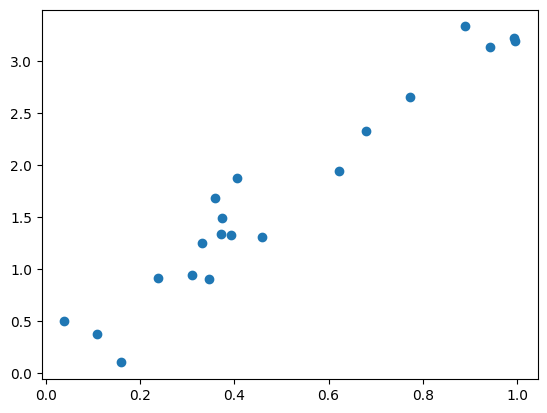

In [ ]:
x = torch.rand(20)
y = 3*x + 0.2 + torch.randn(20)*0.3 # y = ax + b + noise
plt.scatter(x, y) # It's always helpful to visualize what's going on wherever possible.
# plt.plot(x, 3*x + 0.2, color='gray')

### –û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å

–ú—ã –º–æ–∂–µ–º –æ–ø–∏—Å–∞—Ç—å –ª–∏–Ω–∏—é –∫–∞–∫ —Ñ—É–Ω–∫—Ü–∏—é `y = ax + b` –≥–¥–µ a –∏ b - –Ω–∞—à–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø–∞—Ä—É –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω—ã—Ö –ª–∏–Ω–∏–π:

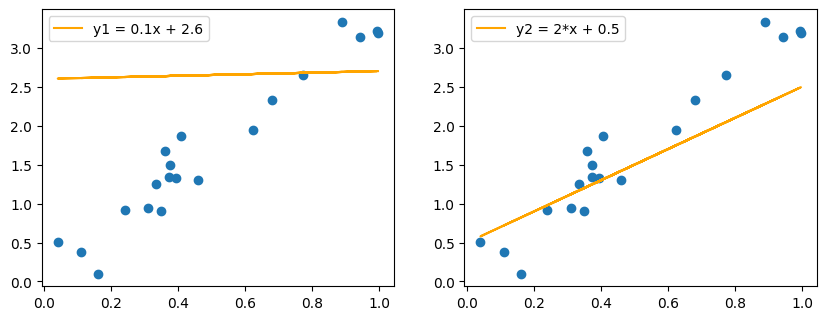

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3.6))
axs[0].scatter(x, y)
axs[0].plot(x, 0.1*x + 2.6, label='y1 = 0.1x + 2.6', c='orange')
axs[0].legend()
axs[1].scatter(x, y)
axs[1].plot(x, 2*x + 0.5, label='y2 = 2*x + 0.5',  c='orange')
axs[1].legend();

–û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –æ–¥–Ω–∞ –∏–∑ –Ω–∏—Ö –ª—É—á—à–µ, —á–µ–º –¥—Ä—É–≥–∞—è, –æ–ø–∏—Å—ã–≤–∞–µ—Ç —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é –≤ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö. –ù–æ –∫–∞–∫ –æ—Ü–µ–Ω–∏—Ç—å —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ? –°—É—â–µ—Å—Ç–≤—É–µ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã—Ö –≤ –ø–æ–¥–æ–±–Ω—ã—Ö —Å–ª—É—á–∞—è—Ö, –æ–¥–Ω–∏–º –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö —è–≤–ª—è–µ—Ç—Å—è "—Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è—è –æ—à–∏–±–∫–∞ (RMSE)". –ó–≤—É—á–∏—Ç –ø—É–≥–∞—é—â–µ, –Ω–æ –≤—Å–µ, —á—Ç–æ –º—ã –¥–µ–ª–∞–µ–º, —ç—Ç–æ –±–µ—Ä–µ–º –æ—à–∏–±–∫–∏ (–Ω–∞—Å–∫–æ–ª—å–∫–æ –∫–∞–∂–¥–∞—è —Ç–æ—á–∫–∞ —É–¥–∞–ª–µ–Ω–∞ –æ—Ç –ª–∏–Ω–∏–∏), –≤–æ–∑–≤–æ–¥–∏–º –∏—Ö –≤ –∫–≤–∞–¥—Ä–∞—Ç, —Å—É–º–º–∏—Ä—É–µ–º –∫–≤–∞–¥—Ä–∞—Ç—ã –∏ –∑–∞—Ç–µ–º –±–µ—Ä–µ–º –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –∫–æ—Ä–µ–Ω—å –∏–∑ —ç—Ç–æ–π —Å—É–º–º—ã. –ë–æ–ª—å—à–µ —Ç–æ—á–µ–∫, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã—Ö –¥–∞–ª—å—à–µ –æ—Ç –ª–∏–Ω–∏–∏ -> –±–æ–ª—å—à–µ –æ—à–∏–±–æ–∫ (–∫–≤–∞–¥—Ä–∞—Ç —É–±–∏—Ä–∞–µ—Ç –≤—Å–µ –∑–Ω–∞–∫–∏ –º–∏–Ω—É—Å, –∫–æ—Ç–æ—Ä—ã–µ –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ –º–æ–≥—É—Ç –≤—ã–∑–≤–∞—Ç—å –ø—Ä–æ–±–ª–µ–º—ã —Å —Ç–æ—á–∫–∞–º–∏ –≤—ã—à–µ/–Ω–∏–∂–µ –ª–∏–Ω–∏–∏) -> –±–æ–ª—å—à–µ –∏—Ç–æ–≥–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ RMSE. –ò —á–µ–º –º–µ–Ω—å—à–µ –æ–Ω–æ, —Ç–µ–º –ª—É—á—à–µ. –≠—Ç–æ –∏ –µ—Å—Ç—å –Ω–∞—à–∞ —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å.

–í–æ—Ç –æ–¥–∏–Ω –∏–∑ —Å–ø–æ—Å–æ–±–æ–≤ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ —ç—Ç–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ –≤ –∫–æ–¥–µ (—Å—É—â–µ—Å—Ç–≤—É—é—Ç —Ç–∞–∫–∂–µ –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è —ç—Ç–æ–≥–æ –∏ –º–Ω–æ–∂–µ—Å—Ç–≤–æ –¥—Ä—É–≥–∏—Ö —Å–ø–æ—Å–æ–±–æ–≤ –Ω–∞–ø–∏—Å–∞–Ω–∏—è):

In [ ]:
def rmse(y, y_pred):
    return torch.mean((y-y_pred)**2)**0.5 # See how many ways you can write this

–ò—Å–ø–æ–ª—å–∑—É—è —ç—Ç—É —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å –º—ã –º–æ–∂–µ–º –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ö–æ—Ä–æ—à–æ —ç—Ç–∏ –ª–∏–Ω–∏–∏ –æ–ø–∏—Å—ã–≤–∞—é—Ç –¥–∞–Ω–Ω—ã–µ:

In [ ]:
y1 = 0.1*x + 2.6
y2 = 2*x + 0.5
print('RMSE for y_hat1 = 0.1x + 2.6:', rmse(y, y1))
print('RMSE for y_hat2 = 2*x + 0.5:', rmse(y, y2))

RMSE for y_hat1 = 0.1x + 2.6: tensor(1.3460)
RMSE for y_hat2 = 2*x + 0.5: tensor(0.4854)


–í—Ç–æ—Ä–∞—è –ª–∏–Ω–∏—è –∏–º–µ–µ—Ç –º–µ–Ω—å—à–∏–µ –ø–æ—Ç–µ—Ä–∏ –∏ –ø–æ—ç—Ç–æ–º—É –ª—É—á—à–µ –ø–æ–¥—Ö–æ–¥–∏—Ç. –ü–æ–¥–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–π—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏ –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ, –º–æ–∂–µ—Ç –±—ã—Ç—å, –ø–æ–ª—É—á–∏—Ç—Å—è –µ—â–µ –ª—É—á—à–µ.

–í–æ–∑–º–æ–∂–Ω–æ –≤—ã –ø—Ä–∏ —ç—Ç–æ–º –Ω–µ—è–≤–Ω–æ –±—É–¥–µ—Ç–µ –¥–µ–ª–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã–π —Å–ø—É—Å–∫ :)

### –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤

–ò—Ç–∞–∫, –∫–∞–∫ –∂–µ –Ω–∞–π—Ç–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã? –ï—Å–ª–∏ –≤—ã —Ö–æ—Ä–æ—à–æ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ—Ç–µ, —Ç–æ –º–æ–∂–µ—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —Ñ—É–Ω–∫—Ü–∏—é –∏ –Ω–∞–π—Ç–∏ –∏—Ö –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏. –ù–æ —ç—Ç–æ –Ω–µ —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ, –µ—Å–ª–∏ —Ñ—É–Ω–∫—Ü–∏—è —Å–ª–æ–∂–Ω–∞—è –∏–ª–∏ –≤–∫–ª—é—á–∞–µ—Ç –º–Ω–æ–≥–æ —à–∞–≥–æ–≤. –ö —Å—á–∞—Å—Ç—å—é, PyTorch –¥–µ–ª–∞–µ—Ç —Ç–∞–∫ –Ω–∞–∑—ã–≤–∞–µ–º–æ–µ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ—Ç—Å–ª–µ–∂–∏–≤–∞—Ç—å –∫–∞–∂–¥—É—é –æ–ø–µ—Ä–∞—Ü–∏—é, –ø—Ä–æ–∏—Å—Ö–æ–¥—è—â—É—é —Å —Ç–µ–Ω–∑–æ—Ä–æ–º. –û–Ω —Å—Ç—Ä–æ–∏—Ç —Ç–∞–∫ –Ω–∞–∑—ã–≤–∞–µ–º—ã–π –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã–π –≥—Ä–∞—Ñ, –∏ –∫–æ–≥–¥–∞ –≤—ã —Ö–æ—Ç–∏—Ç–µ –≤—ã—á–∏—Å–ª–∏—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ –∫–æ–Ω–µ—á–Ω–æ–≥–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞, –≤—ã –º–æ–∂–µ—Ç–µ –ø—Ä–æ—Å—Ç–æ –≤—ã–∑–≤–∞—Ç—å .backward(), –∏ PyTorch –ø—Ä–æ–ª–æ–∂–∏—Ç –ø—É—Ç—å –Ω–∞–∑–∞–¥ –ø–æ —ç—Ç–æ–º—É –≥—Ä–∞—Ñ—É, –∑–∞–ø–æ–ª–Ω—è—è –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã –Ω–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ. –ú—ã –Ω–µ –±—É–¥–µ–º —É–≥–ª—É–±–ª—è—Ç—å—Å—è –≤ —ç—Ç—É —Ç–µ–º—É, –Ω–æ –ø—Ä–∏–≤–µ–¥–µ–º –ø—Ä–æ—Å—Ç–æ–π –ø—Ä–∏–º–µ—Ä:

In [ ]:
a = torch.tensor(5.7)
a.requires_grad = True # This is important - by default PyTorch won't track gradients

b = 5*a + 2

c = torch.sin(2*b+0.1)

c

tensor(-0.9871, grad_fn=<SinBackward0>)

–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ `grad_fn`. –ü–æ—Å–∫–æ–ª—å–∫—É `c` –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —á–µ–≥–æ-—Ç–æ (`b`), —á—Ç–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ç–µ–Ω–∑–æ—Ä–∞, —Ç—Ä–µ–±—É—é—â–µ–≥–æ –≥—Ä–∞–¥–∏–µ–Ω—Ç (`a`), PyTorch –æ—Ç—Å–ª–µ–∂–∏–≤–∞–µ—Ç —Ñ—É–Ω–∫—Ü–∏—é, –Ω–µ–æ–±—Ö–æ–¥–∏–º—É—é –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤. –ú—ã –º–æ–∂–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç c –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ `a` —Å –ø–æ–º–æ—â—å—é:

In [ ]:
c.backward() # Tell pytorch to propagate the gradients backwards down the chain of operations
a.grad # See the resulting gradient

tensor(-1.6036)

–ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è `c` –ø–æ `a` —Ä–∞–≤–Ω–∞ $10\cdot cos(10 \cdot (a + 0.41))$ - –ø–æ–¥—Å—Ç–∞–≤–ª—è—è `a=5.7`, –º—ã –≤–∏–¥–∏–º, —á—Ç–æ —ç—Ç–æ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –¥–∞–µ—Ç –æ—Ç–≤–µ—Ç `dc/da` = -1.603. –≠—Ç–æ –ø—Ä–æ—Å—Ç–æ —á—É–¥–µ—Å–Ω–æ - –º—ã –º–æ–∂–µ–º —Å–æ–µ–¥–∏–Ω–∏—Ç—å —Å–ª–æ–∂–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ –≤ —Ü–µ–ø–æ—á–∫—É, –∏ –ø–æ–∫–∞ –≤—Å–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–æ, –º—ã –º–æ–∂–µ–º –ø–æ–ª–æ–∂–∏—Ç—å—Å—è –Ω–∞ PyTorch, –∫–æ—Ç–æ—Ä—ã–π —Å–º–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –≤ –æ–±—Ä–∞—Ç–Ω–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ –∏ –¥–∞—Å—Ç –Ω–∞–º –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã.

### –ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ –¥–ª—è –Ω–∞—à–µ–≥–æ –∏–≥—Ä—É—à–µ—á–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞

–í–µ—Ä–Ω–µ–º—Å—è –∫ –Ω–∞—à–µ–º—É –ø—Ä–∏–º–µ—Ä—É, –≥–¥–µ –º—ã –ø—ã—Ç–∞–ª–∏—Å—å –Ω–∞–π—Ç–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –ª–∏–Ω–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –Ω–∞–∏–ª—É—á—à–∏–º –æ–±—Ä–∞–∑–æ–º –æ–ø–∏—Å—ã–≤–∞–µ—Ç —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é –≤ –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö.

–ú—ã —Å–æ–∑–¥–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã `w` (–∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ 2 —Å–ª—É—á–∞–π–Ω—ã–º–∏ –ø–ª–∞–≤–∞—é—â–∏–º–∏ —á–∏—Å–ª–∞–º–∏) –∏ —É–∫–∞–∑—ã–≤–∞–µ–º pytorch –Ω–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç—å –æ—Ç—Å–ª–µ–∂–∏–≤–∞—Ç—å –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã.

–ó–∞—Ç–µ–º, –≤ —Ü–∏–∫–ª–µ, –º—ã –º–Ω–æ–≥–æ–∫—Ä–∞—Ç–Ω–æ –Ω–∞—Ö–æ–¥–∏–º –ø–æ—Ç–µ—Ä–∏, –Ω–∞—Ö–æ–¥–∏–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—ã (`loss.backward()`) –∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º –æ–±–Ω–æ–≤–ª—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã. –ú—ã –º–æ–≥–ª–∏ –±—ã —Å–¥–µ–ª–∞—Ç—å —ç—Ç–æ —Å–∞–º–∏, –Ω–æ PyTorch –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π –≤—ã–ø–æ–ª–Ω—è–µ—Ç –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –∑–∞ –Ω–∞—Å - torch.optim.SGD. –°–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è `lr` –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç, —Ä–∞–∑–º–µ—Ä —à–∞–≥–∞, –∫–æ—Ç–æ—Ä—ã–π –º—ã –¥–µ–ª–∞–µ–º –Ω–∞ –∫–∞–∂–¥–æ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏.

–ü–æ—Å–ª–µ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è —Ü–∏–∫–ª–∞ –º—ã —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –ø–æ—Ç–µ—Ä—å –∏ –≤–∏–¥–∏–º, —á—Ç–æ —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º –ø–æ—Ç–µ—Ä–∏ —É–º–µ–Ω—å—à–∞—é—Ç—Å—è.

tensor([0.7971, 0.1210], requires_grad=True)
loss at step 19 : tensor(0.4397, grad_fn=<PowBackward0>)
w at step 19 : tensor([1.9997, 0.7544], requires_grad=True)
loss at step 39 : tensor(0.2971, grad_fn=<PowBackward0>)
w at step 39 : tensor([2.6680, 0.4039], requires_grad=True)
loss at step 59 : tensor(0.2494, grad_fn=<PowBackward0>)
w at step 59 : tensor([3.0482, 0.2045], requires_grad=True)
loss at step 79 : tensor(0.2423, grad_fn=<PowBackward0>)
w at step 79 : tensor([3.1929, 0.1286], requires_grad=True)
loss at step 99 : tensor(0.2415, grad_fn=<PowBackward0>)
w at step 99 : tensor([3.2408, 0.1034], requires_grad=True)


Text(0.5, 1.0, 'Loss over time')

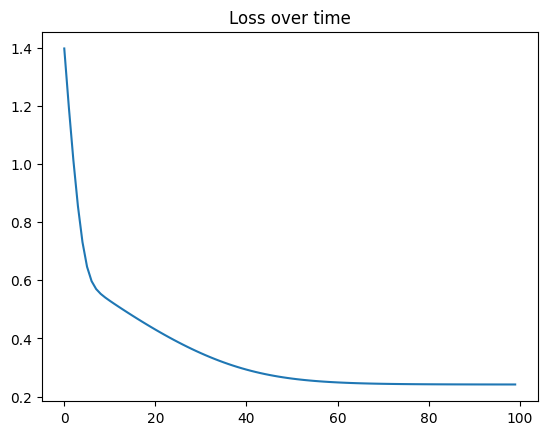

In [ ]:
w = torch.rand(2) # Our parameters
w.requires_grad = True # Explain
print(w)

optimizer = torch.optim.SGD([w], lr=0.2) # Research: What does SGD stand for?

losses = [] # Keep track of our losses (RMSE values)
ws = [] # Keep track of the values we predicted

for i in range(100):

    # Reset everything related to gradient calculations
    optimizer.zero_grad()

    # Get our outputs
    y_hat = w[0]*x + w[1]

    # Calculate our loss
    loss = rmse(y, y_hat)

    # Store the loss and a copy of the weights for later
    losses.append(loss.detach().item())
    ws.append(w.clone().detach().numpy())

    # Print out updates ever few iterations
    if (i + 1) % 20 == 0:
        print('loss at step', i, ':', loss)
        print('w at step', i, ':', w)

    # Backpropagate the loss and use it to update the parameters
    loss.backward() # This does all the gradient calculations
    optimizer.step() # The optimizer does the update.


plt.plot(losses)
plt.title('Loss over time')

–ù–∞—à–∏ —Å–ª—É—á–∞–π–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±–Ω–æ–≤–ª—è–ª–∏—Å—å 100 —Ä–∞–∑ –∏ —Å–µ–π—á–∞—Å –±–ª–∏–∑–∫–∏ –∫ –Ω–∞–∏–ª—É—á—à–∏–º:

In [ ]:
w # View the learned parameters

tensor([3.1560, 0.0374], requires_grad=True)

In [ ]:
w.grad # We can see the gradients of the loss with respect to w (now small since we're close to optimum)

tensor([-0.0064,  0.0026])

–ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –ª–∏–Ω–∏–∏:

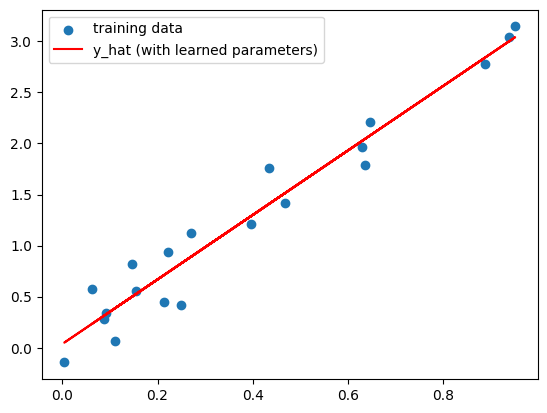

In [ ]:
plt.scatter(x, y, label='training data')
y_hat = w[0]*x + w[1]
plt.plot(x, y_hat.detach(), c='red', label='y_hat (with learned parameters)')
plt.legend();

–ü–æ—Å–∫–æ–ª—å–∫—É —É –Ω–∞—Å –≤—Å–µ–≥–æ –¥–≤–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞, –º—ã –º–æ–∂–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫, –ø–æ–∫–∞–∑—ã–≤–∞—é—â–∏–π –ø–æ—Ç–µ—Ä–∏ –¥–ª—è –∫–∞–∂–¥–æ–π –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏ –∑–Ω–∞—á–µ–Ω–∏–π –≤ –Ω–µ–∫–æ—Ç–æ—Ä–æ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ. –ú—ã –∏–∑–æ–±—Ä–∞–∑–∏–º –∑–Ω–∞—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –≤–æ –≤—Ä–µ–º—è —Ü–∏–∫–ª–∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≤ –≤–∏–¥–µ —Ç–æ—á–µ–∫, –∏ –≤—ã —É–≤–∏–¥–∏—Ç–µ, –∫–∞–∫ –æ–Ω–∏ –º–µ–¥–ª–µ–Ω–Ω–æ "–¥–≤–∏–∂—É—Ç—Å—è" –∫ —Ç–æ—á–∫–µ —Å –º–µ–Ω—å—à–∏–º–∏ –ø–æ—Ç–µ—Ä—è–º–∏:

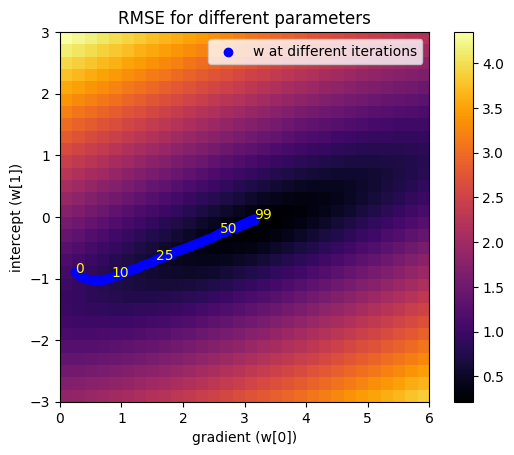

In [ ]:
w1, w2 = torch.meshgrid(torch.arange(0, 6, 0.2), torch.arange(-3, 3, 0.2), indexing='ij') # Grids with both parameters
width, height = w1.shape

# Calculating y_hat for each seat of params and then the resulting RMSEs
y_preds = x.unsqueeze(0).expand(width*height, -1) * w1.flatten().unsqueeze(0).expand(20, -1).T + w2.flatten().unsqueeze(0).expand(20, -1).T
rmses = torch.mean((y.unsqueeze(0).expand(width*height, -1)-y_preds)**2, dim=1)**0.5

# Showing the loss landscape
plt.imshow(rmses.reshape(width, height).T, cmap='inferno', extent=[0, 6, -3, 3])
plt.colorbar()
plt.title('RMSE for different parameters')
plt.xlabel('gradient (w[0])')
plt.ylabel('intercept (w[1])')

# Showing the path we took over time. We need x, -y due to the way imshow works
plt.scatter([w[0] for w in ws], [-w[1] for w in ws], c='blue', label='w at different iterations')
for i in [0, 10, 25, 50, 99]:
  plt.annotate(i, (ws[i][0], -ws[i][1]), c='yellow')
plt.legend()
plt.show()

–í–º–µ—Å—Ç–æ optimizer.step() –º—ã –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å `w -= w.grad * 0.2`, –≥–¥–µ 0.2 - —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è, –∞ –∑–Ω–∞–∫ –º–∏–Ω—É—Å - –ø–æ—Ç–æ–º—É —á—Ç–æ –º—ã —Ö–æ—Ç–∏–º –¥–≤–∏–≥–∞—Ç—å—Å—è –≤ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏, —É–º–µ–Ω—å—à–∞—é—â–µ–º –ø–æ—Ç–µ—Ä–∏ (—Ç–æ –µ—Å—Ç—å –≤ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏, –ø—Ä–æ—Ç–∏–≤–æ–ø–æ–ª–æ–∂–Ω–æ–º –≥—Ä–∞–¥–∏–µ–Ω—Ç—É).

–ü–æ–ø—Ä–æ–±—É–π—Ç–µ —Å–¥–µ–ª–∞—Ç—å —ç—Ç–æ –∏ —É–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ —ç—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç. (–í–∞–º –ø–æ–Ω–∞–¥–æ–±–∏—Ç—Å—è `with torch.no_grad(): w -= w.grad * 0.2`, –∏–Ω–∞—á–µ PyTorch –±—É–¥–µ—Ç –∂–∞–ª–æ–≤–∞—Ç—å—Å—è - –ø–æ–ø—Ä–æ–±—É–π—Ç–µ —Å–Ω–∞—á–∞–ª–∞ –±–µ–∑ –Ω–µ–≥–æ, —á—Ç–æ–±—ã –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –æ—à–∏–±–∫—É, —Å –∫–æ—Ç–æ—Ä–æ–π –≤—ã, –≤–µ—Ä–æ—è—Ç–Ω–æ, –≤—Å—Ç—Ä–µ—Ç–∏—Ç–µ—Å—å –µ—â–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤ –∂–∏–∑–Ω–∏ ;)

**–ß–∞—Å—Ç–æ—Ç–∞ –æ–±—É—á–µ–Ω–∏—è**

![](https://i.stack.imgur.com/au77i.png)

<a name="loss"></a>
## –ú–µ—Ç–æ–¥—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏

–ì—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ (–∏–ª–∏ —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫ (SGD), –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–æ—Å—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞ –±–∞—Ç—á–∞—Ö, –≤–º–µ—Å—Ç–æ –ø–æ–ª–Ω–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö) —ç—Ç–æ –ª–∏—à—å –æ–¥–∏–Ω –∏–∑ –º–µ—Ç–æ–¥–æ–≤ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏. –°—É—â–µ—Å—Ç–≤—É–µ—Ç –º–Ω–æ–∂–µ—Å—Ç–≤–æ –±–æ–ª–µ–µ –ø—Ä–æ–¥–≤–∏–Ω—É—Ç—ã—Ö –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤. –ï—Å–ª–∏ –≤–∞–º –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, –≤–æ—Ç –æ—Ç–ª–∏—á–Ω—ã–π –æ–±–∑–æ—Ä –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è —Å–µ–≥–æ–¥–Ω—è: https://ruder.io/optimizing-gradient-descent/.

–û–¥–Ω–∞ –∏–∑ –ø–æ–ª–µ–∑–Ω—ã—Ö –∏–¥–µ–π, –∫–æ—Ç–æ—Ä–∞—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –≤ PyTorch –≤–º–µ—Å—Ç–µ —Å –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞–º–∏, - —ç—Ç–æ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è. –≠—Ç–æ –±–æ–ª—å—à–∞—è —Ç–µ–º–∞, –Ω–æ, –ø–æ —Å—É—Ç–∏, —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∞ –Ω–∞ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –Ω–∞–±–æ—Ä–æ–≤ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ —É–ø—Ä–æ—â–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø—É—Ç–µ–º –æ—Ç–∫–∞–∑–∞ –æ—Ç —Å–ª–∏—à–∫–æ–º —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ä–µ—Å—É—Ä—Å—ã: <br>
- [The spelled-out intro to neural networks and backpropagation: building micrograd](https://www.youtube.com/watch?v=VMj-3S1tku0), –≥–¥–µ –ê–Ω–¥–∂–µ–π –ö–∞—Ä–ø–∞—Ç—ã –æ–±—É—á–∞–µ—Ç –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å —Å –Ω—É–ª—è, –≤–∫–ª—é—á–∞—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –∏ –¥—Ä—É–≥–∏–µ –≤–µ—â–∏

<a name="nn"></a>
## –ü—Ä–æ—Å—Ç–µ–π—à–∞—è –Ω–µ–π—Ä–æ—Å–µ—Ç—å

–ù–∞—á–Ω–µ–º —Å —Å–æ–∑–¥–∞–Ω–∏—è –Ω–µ–±–æ–ª—å—à–æ–π —Å–µ—Ç–∏ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –Ω–µ–±–æ–ª—å—à–æ–π –∏—Å–∫—É—Å—Å—Ç–≤–µ–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏. –ú—ã —Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ —Ö–æ—Ç–∏–º, —á—Ç–æ–±—ã –Ω–∞—à–∞ —Å–µ—Ç—å –≤—ã—É—á–∏–ª–∞ –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –º–µ–∂–¥—É –≤—Ö–æ–¥–Ω—ã–º–∏ (x) –∏ –≤—ã—Ö–æ–¥–Ω—ã–º–∏ (y) –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.

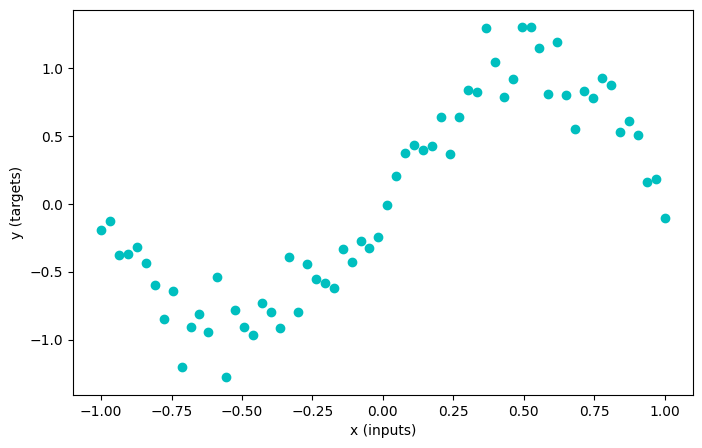

In [ ]:
n_samples = 64
inputs = torch.linspace(-1.0, 1.0, n_samples).reshape(n_samples, 1)
noise = torch.randn(n_samples, 1) / 5
targets = torch.sin(3.14 * inputs) + noise
plt.figure(figsize=(8, 5))
plt.scatter(inputs, targets, c='c')
plt.xlabel('x (inputs)')
plt.ylabel('y (targets)')
plt.show()

–í–æ—Ç –∫–∞–∫ –º—ã –º–æ–∂–µ–º —Å–æ–∑–¥–∞—Ç—å –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å —Å –æ–¥–Ω–∏–º —Å–∫—Ä—ã—Ç—ã–º —Å–ª–æ–µ–º, –æ–ø–∏—Ä–∞—è—Å—å –Ω–∞ —É–¥–æ–±–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ PyTorch:

In [ ]:
class WideNet(nn.Module):

    def __init__(self, n_cells=512): # Initialize our network
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, n_cells), # One input, n_cells outputs
            nn.ReLU(), # Our non-linearity - there are many on offer!
            nn.Linear(n_cells, 1), # n_cells inputs, one output
        )

    def forward(self, x):
        return self.layers(x)

–ú—ã –Ω–∞—Å–ª–µ–¥—É–µ–º –æ—Ç –∫–ª–∞—Å—Å–∞ nn.Module, —á—Ç–æ –¥–∞–µ—Ç –Ω–∞–º –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –≤–º–µ—Å—Ç–æ –ø—Ä—è–º–æ–≥–æ –≤—ã–∑–æ–≤–∞ –º–µ—Ç–æ–¥–∞ forward (–∫–æ—Ç–æ—Ä—ã–π –ø–µ—Ä–µ–¥–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ —á–µ—Ä–µ–∑ —Ä–∞–∑–ª–∏—á–Ω—ã–µ —Å–ª–æ–∏) –º—ã –º–æ–∂–µ–º –ø—Ä–æ—Å—Ç–æ –≤—ã–∑—ã–≤–∞—Ç—å —Å–≤–æ—é —Å–µ—Ç—å –∫–∞–∫ —Ñ—É–Ω–∫—Ü–∏—é:

In [ ]:
wn = WideNet()
print('Input shape:', inputs.shape)
out = wn(inputs) # This passes our data in as the input to the forward method defined above
print('Output shape:', out.shape)
print('PyTorch sumary of wn:')
wn

Input shape: torch.Size([64, 1])
Output shape: torch.Size([64, 1])
PyTorch sumary of wn:


WideNet(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=512, bias=True)
    (1): Tanh()
    (2): Linear(in_features=512, out_features=1, bias=True)
  )
)

–≠—Ç–∞ —Å–µ—Ç—å –≤–∫–ª—é—á–∞–µ—Ç –≤ —Å–µ–±—è –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å–ª–æ–µ–≤ —Å –æ–±—É—á–∞–µ–º—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏. –ú—ã –º–æ–∂–µ–º –ø–æ–ª—É—á–∏—Ç—å –¥–æ—Å—Ç—É–ø –∫–æ –≤—Å–µ–º —ç—Ç–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º —á–µ—Ä–µ–∑ `wn.parameters()` - –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º—ã –ø–æ–ª—É—á–∞–µ–º —á–µ—Ç—ã—Ä–µ –Ω–∞–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ - –≤–µ—Å–∞ –∏ —Å–º–µ—â–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ –¥–≤—É—Ö –ª–∏–Ω–µ–π–Ω—ã—Ö —Å–ª–æ–µ–≤. –ù–µ —Å—Ç–µ—Å–Ω—è–π—Ç–µ—Å—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å —Å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º —Å–µ—Ç–∏ –∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫ –±—É–¥—É—Ç –º–µ–Ω—è—Ç—å—Å—è –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:

In [ ]:
[p.shape for p in wn.parameters()]

[torch.Size([512, 1]),
 torch.Size([512]),
 torch.Size([1, 512]),
 torch.Size([1])]

–ü—Ä–∏—à–ª–æ –≤—Ä–µ–º—è —Ü–∏–∫–ª–∞ –æ–±—É—á–µ–Ω–∏—è - —Å—Ä–∞–≤–Ω–∏—Ç–µ –µ–≥–æ —Å —Ü–∏–∫–ª–æ–º –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–º —É—Ä–æ–∫–µ (—Å–ø–æ–π–ª–µ—Ä: –æ–Ω–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ!). –ú—ã –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–∞—à–µ–π –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ - –≤—Å–µ –≤–µ—Å–∞ –∏ —Å–º–µ—â–µ–Ω–∏—è –≤ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å–ª–æ—è—Ö.

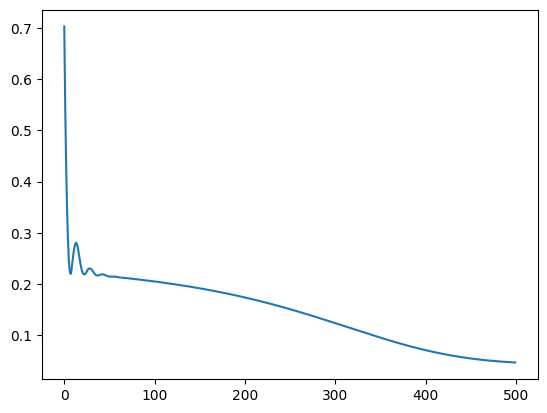

In [ ]:
# Create our network
wide_net = WideNet()

# Create a mse loss function
loss_function = nn.MSELoss()

# Stochstic Gradient Descent optimizer
optimizer = torch.optim.Adam(wide_net.parameters(), lr=1e-3)

# The training loop
losses = []  # keeping recods of loss
for i in range(500): # 500 'epochs' of training
    optimizer.zero_grad()  # set gradients to 0
    predictions = wide_net(inputs)  # Compute model prediction (output)
    loss = loss_function(predictions, targets)  # Compute the loss
    loss.backward()  # Compute gradients (backward pass)
    optimizer.step()  # update parameters (optimizer takes a step)

    # Storing our loss for later viewing
    losses.append(loss.item())

# Plot the losses over time
plt.plot(losses) # Plot the losses over time

–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –Ω–∞–º –Ω–µ –Ω—É–∂–Ω–æ –≤—Ä—É—á–Ω—É—é –∑–∞–¥–∞–≤–∞—Ç—å require_grad –Ω–∏ –¥–ª—è –æ–¥–Ω–æ–≥–æ –∏–∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–±—É—á–∞–µ–º—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≤ –∫–∞–∂–¥–æ–º —Å–ª–æ–µ –≥—Ä—É–ø–ø–∏—Ä—É—é—Ç—Å—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ —Å –ø–æ–º–æ—â—å—é `wide_net.parameters()` (–ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ –¥–æ—Å—É–≥–µ, —á—Ç–æ –≤ –Ω–µ–º —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è).

–ü–æ—Å–º–æ—Ç—Ä–∏–º, —á–µ–º—É –º–æ–¥–µ–ª—å –æ–±—É—á–∏–ª–∞—Å—å

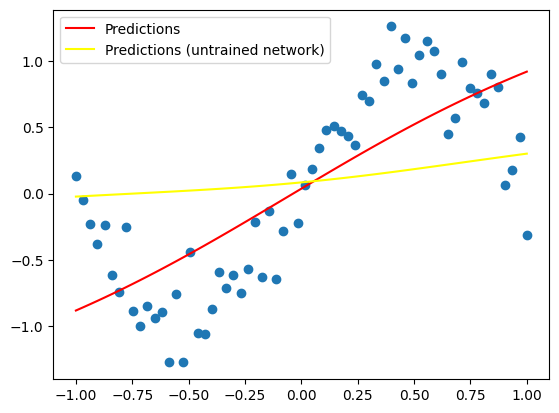

In [ ]:
plt.scatter(inputs, targets)
plt.plot(inputs, wide_net(inputs).detach(), c='red', label='Predictions')
# Create a new, untrained widenet and plot those predictions for comparison
new_wn = WideNet()
plt.plot(inputs, new_wn(inputs).detach(), c='yellow', label='Predictions (untrained network)')
plt.legend()
plt.show()

## –£–ø—Ä–∞–∂–Ω–µ–Ω–∏—è

* –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –ø–æ—Ä–µ–≥—É–ª–∏—Ä–æ–≤–∞—Ç—å —á–∞—Å—Ç–æ—Ç—É –æ–±—É—á–µ–Ω–∏—è, —á—Ç–æ–±—ã –∑–∞—Å—Ç–∞–≤–∏—Ç—å —Å–µ—Ç—å —Ä–∞—Å—Ö–æ–¥–∏—Ç—å—Å—è –∏–ª–∏ –Ω–∞–æ–æ–±–æ—Ä–æ—Ç –æ—á–µ–Ω—å –¥–æ–ª–≥–æ —Å—Ö–æ–¥–∏—Ç—å—Å—è
* —Å–æ–∑–¥–∞–π—Ç–µ –Ω–µ–π—Ä–æ—Å–µ—Ç—å —Å –¥–≤—É–º—è —Å–∫—Ä—ã—Ç—ã–º–∏ —Å–ª–æ—è–º–∏ –∏ –æ–±—É—á–∏—Ç–µ –Ω–∞ —Ç–æ–π –∂–µ –∑–∞–¥–∞—á–µ

<a name="history"></a>
## The Generative AI Timeline

¬© by David Foster (–≥–¥–µ-—Ç–æ –Ω–∞ –ø—Ä–æ—Å—Ç–æ—Ä–∞—Ö –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–∞)

* üéá 2014-2017 –≠—Ä–∞ VAE –∏ GAN
  
  –ò–∑–æ–±—Ä–µ—Ç–µ–Ω–∏–µ VAE –≤ –¥–µ–∫–∞–±—Ä–µ 2013 –≥–æ–¥–∞ –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –∏—Å–∫—Ä–æ–π, –∑–∞–∂–µ–≥—à–µ–π –±—É–º–∞–≥—É –≥–µ–Ω–µ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ –ò–ò, –∑–∞ –∫–æ—Ç–æ—Ä–æ–π –≤ 2014 –≥–æ–¥—É –ø–æ—Å–ª–µ–¥–æ–≤–∞–ª –ø–µ—Ä–≤—ã–π GAN. –ü–æ—Å–ª–µ–¥—É—é—â–∏–µ —Ç—Ä–∏ –≥–æ–¥–∞ –±—ã–ª–∏ –æ—Ç–º–µ—á–µ–Ω—ã —Ñ—É–Ω–¥–∞–º–µ–Ω—Ç–∞–ª—å–Ω—ã–º–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è–º–∏ –≤ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–µ GAN-–º–æ–¥–µ–ª–∏ (DCGAN, 2015), —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å (Wasserstein GAN, 2017) –∏ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è (ProGAN, 2017), –∞ —Ç–∞–∫–∂–µ –æ—Å–≤–æ–µ–Ω–∏–µ–º –Ω–æ–≤—ã—Ö –æ–±–ª–∞—Å—Ç–µ–π —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º GAN, —Ç–∞–∫–∏—Ö –∫–∞–∫ –ø–µ—Ä–µ–≤–æ–¥ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π (pix2pix, 2016 –∏ CycleGAN, 2017) –∏ –≥–µ–Ω–µ—Ä–∞—Ü–∏—è –º—É–∑—ã–∫–∏ (MuseGAN, 2017).

* üìù 2018-2019 –≠—Ä–∞ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤

  –¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –±—ã—Å—Ç—Ä–æ –∑–∞–≤–æ–µ–≤–∞–ª –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å, –∫–æ–≥–¥–∞ –±—ã–ª –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω GPT (—Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä, —Å–æ—Å—Ç–æ—è—â–∏–π —Ç–æ–ª—å–∫–æ –∏–∑ –¥–µ–∫–æ–¥–µ—Ä–∞). –í –ø–æ—Å–ª–µ–¥—É—é—â–∏–µ –≥–æ–¥—ã —Å–æ–∑–¥–∞–≤–∞–ª–∏—Å—å –≤—Å–µ –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã–µ —è–∑—ã–∫–æ–≤—ã–µ –º–æ–¥–µ–ª–∏, —Å—Ä–µ–¥–∏ –∫–æ—Ç–æ—Ä—ã—Ö –≤—ã–¥–µ–ª—è—é—Ç—Å—è GPT-2 (2018, 1,5B –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤) –∏ T5 (2019, 11B –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤).

* ü§ñ 2020-2022: –≠—Ä–∞ –±–æ–ª—å—à–∏—Ö –º–æ–¥–µ–ª–µ–π

  –í —ç—Ç–æ—Ç –ø–µ—Ä–∏–æ–¥ –ø—Ä–æ–∏–∑–æ—à–ª–æ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –∏–¥–µ–π –∏–∑ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å–µ–º–µ–π—Å—Ç–≤ –≥–µ–Ω–µ—Ä–∞—Ç–∏–≤–Ω–æ–≥–æ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è. –ù–∞–ø—Ä–∏–º–µ—Ä, VQ-GAN (2020) –ø—Ä–∏–≤–Ω–µ—Å –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä GAN –≤ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É VQ-VAE, –∞ Vision Transformer (2020) –ø–æ–∫–∞–∑–∞–ª, –∫–∞–∫ –º–æ–∂–Ω–æ –æ–±—É—á–∏—Ç—å —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏. –í 2020 –≥–æ–¥—É –±—ã–ª–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –¥–≤–µ –º–æ–¥–µ–ª–∏, –∫–æ—Ç–æ—Ä—ã–µ –∑–∞–ª–æ–∂–∏–ª–∏ –æ—Å–Ω–æ–≤—É –¥–ª—è –≤—Å–µ—Ö –±—É–¥—É—â–∏—Ö –º–æ–¥–µ–ª–µ–π –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –±–æ–ª—å—à–∏—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π - DDPM –∏ DDIM. –ù–µ–æ–∂–∏–¥–∞–Ω–Ω–æ –¥–∏—Ñ—Ñ—É–∑–∏–æ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ —Å—Ç–∞–ª–∏ –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–∞–º–∏ GAN –ø–æ –∫–∞—á–µ—Å—Ç–≤—É –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π.

  –ü—Ä–∏–º–µ—Ä–Ω–æ –≤ —ç—Ç–æ –∂–µ –≤—Ä–µ–º—è –±—ã–ª –≤—ã–ø—É—â–µ–Ω GPT-3 (2020) - —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä —Å 175B –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤. –í—Å–ª–µ–¥ –∑–∞ —ç—Ç–∏–º –±—ã–ª –≤—ã–ø—É—â–µ–Ω —Ü–µ–ª—ã–π —à–∫–≤–∞–ª –¥—Ä—É–≥–∏—Ö –∫—Ä—É–ø–Ω—ã—Ö —è–∑—ã–∫–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π, –∫–æ–Ω–∫—É—Ä–∏—Ä—É—é—â–∏—Ö —Å GPT-3, –≤–∫–ª—é—á–∞—è Gopher (2021) –∏ Chinchilla (2022) –æ—Ç DeepMind, LaMDA (2022) –∏ PaLM (2022) –æ—Ç Google –∏ OPT (2022) –æ—Ç Meta. –¢–∞–∫–∂–µ –±—ã–ª–∏ –≤—ã–ø—É—â–µ–Ω—ã –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –º–æ–¥–µ–ª–∏ —Å –æ—Ç–∫—Ä—ã—Ç—ã–º –∏—Å—Ö–æ–¥–Ω—ã–º –∫–æ–¥–æ–º, —Ç–∞–∫–∏–µ –∫–∞–∫ GPT-J (2021) –∏ GPT-NeoX (2022) –æ—Ç EleutherAI –∏ BLOOM (2022) –æ—Ç HuggingFace. ChatGPT (2022) - —ç—Ç–æ –≤–µ–±-–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ –∏ API-–æ–±–µ—Ä—Ç–∫–∞ –≤–æ–∫—Ä—É–≥ –ø–æ—Å–ª–µ–¥–Ω–µ–π –≤–µ—Ä—Å–∏–∏ GPT –æ—Ç OpenAI, –ø–æ–∑–≤–æ–ª—è—é—â–∞—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º –≤–µ—Å—Ç–∏ –¥–∏–∞–ª–æ–≥–∏ —Å –ò–ò.

  –¢–µ–Ω–¥–µ–Ω—Ü–∏—è —Ä–∞–∑–≤–∏—Ç–∏—è –º—É–ª—å—Ç–∏–º–æ–¥–∞–ª—å–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π –±—ã–ª–∞ –∑–∞–ª–æ–∂–µ–Ω–∞ –≤ DALL.E (OpenAI) - –º–æ–¥–µ–ª–∏ "—Ç–µ–∫—Å—Ç-–∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ", –æ—Å–Ω–æ–≤–∞–Ω–Ω–æ–π –Ω–∞ –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–π VAE (–∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ–π VQ-VAE). –ó–∞ –Ω–µ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞–ª–∞ –º–æ–¥–µ–ª—å DALL.E 2 (2022), –≤ –∫–æ—Ç–æ—Ä–æ–π –≥–µ–Ω–µ—Ä–∞—Ç–∏–≤–Ω–∞—è —á–∞—Å—Ç—å –º–æ–¥–µ–ª–∏ –±—ã–ª–∞ –æ–±–Ω–æ–≤–ª–µ–Ω–∞ –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞—Å—å –¥–∏—Ñ—Ñ—É–∑–∏–æ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å.–í —ç—Ç–æ—Ç –ø–µ—Ä–∏–æ–¥ —Ç–∞–∫–∂–µ –ø–æ—è–≤–∏–ª–∏—Å—å –º–æ–¥–µ–ª–∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ç–µ–∫—Å—Ç–∞ –≤ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –æ—Ç Google, —Ç–∞–∫–∏–µ –∫–∞–∫ Imagen (2022 –≥., –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä –∏ –¥–∏—Ñ—Ñ—É–∑–∏–æ–Ω–Ω—É—é –º–æ–¥–µ–ª—å) –∏ Parti (2022 –≥., –∏—Å–ø–æ–ª—å–∑—É–µ—Ç —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ç–æ—Ä –∏ –º–æ–¥–µ–ª—å ViT-VQGAN).

  –î—Ä—É–≥–∏–º –≤–∞–∂–Ω—ã–º –¥–æ—Å—Ç–∏–∂–µ–Ω–∏–µ–º —Å—Ç–∞–ª–∞ Latent Diffusion (2021) - –¥–∏—Ñ—Ñ—É–∑–∏–æ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å, –æ–±—É—á–∞–µ–º–∞—è –≤ –ª–∞—Ç–µ–Ω—Ç–Ω–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ –∞–≤—Ç–æ—ç–Ω–∫–æ–¥–µ—Ä–∞. –ù–∞ —ç—Ç–æ–π —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∞ –º–æ–¥–µ–ª—å Stable Diffusion, –≤—ã–ø—É—â–µ–Ω–Ω–∞—è –∫–æ–º–ø–∞–Ω–∏–µ–π Stability AI. –ö–æ–¥ –∏ –≤–µ—Å–æ–≤—ã–µ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –º–æ–¥–µ–ª–∏ Stable Diffusion –∏–º–µ—é—Ç –æ—Ç–∫—Ä—ã—Ç—ã–π –∏—Å—Ö–æ–¥–Ω—ã–π –∫–æ–¥, —Ç–æ –µ—Å—Ç—å –ª—é–±–æ–π –∂–µ–ª–∞—é—â–∏–π –º–æ–∂–µ—Ç –∑–∞–ø—É—Å—Ç–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ —Å–≤–æ–µ–º –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–∏.

* üéâ 2023 - –í–ø–µ—Ä–µ–¥–∏ –∑–∞–∑–≤–∞—Ç—ã–≤–∞—é—â–∏–µ –≤—Ä–µ–º–µ–Ω–∞...



![Generative AI Timeline by D.Foster](https://github.com/davidADSP/Generative_Deep_Learning_2nd_Edition/blob/1974ad0b5a5c5998937b264c4e6b7717ed924c5e/docs/timeline.png?raw=true)